In [72]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [87]:
image = np.zeros((640, 640))

In [88]:
paths = json.load(open('paths.json'))

In [89]:
for path in paths:
    if path['mode'] == 'draw':
        color = (1, 1, 1)
        thickness = 32
    else:
        color = (0, 0, 0)
        thickness = 16

    data = path['data']
    for a, b in zip(data, data[1:]):
        a = tuple(map(int, a))
        b = tuple(map(int, b))
            
        image = cv2.line(image, a, b, color, thickness)
        

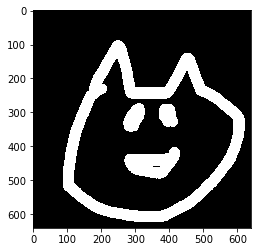

In [90]:
plt.imshow(image, cmap='gray')

In [91]:
resized = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)

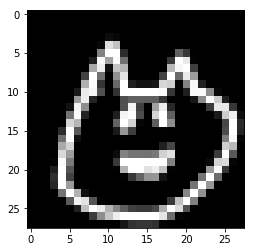

In [92]:
plt.imshow(resized, cmap='gray')

In [93]:
data_input = resized.reshape((1, 28, 28, 1))
data_input = data_input * 2 - 1

In [94]:
import keras

In [95]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 12

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [96]:
model.load_weights('./models/weights.19-0.61-0.79-0.51-0.82.hdf5')

In [99]:
model.predict(data_input)

array([[9.97922957e-01, 7.99376121e-10, 2.99818703e-06, 2.07390497e-03,
        1.20803945e-08, 4.75270934e-09, 2.74909571e-08, 2.27708564e-12,
        1.68487986e-07, 6.00810202e-09, 4.92619030e-08, 9.83955317e-09]],
      dtype=float32)

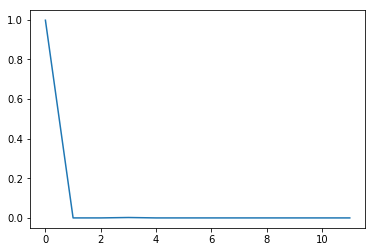

In [100]:
plt.plot(model.predict(data_input).T)

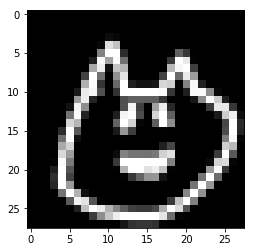

In [98]:
plt.imshow(data_input.reshape(28, 28), cmap='gray')